# 01. Introduction to K-Means

# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.
- Unsupervised Learning - Value of y is not used for learning - but we can use it to find the accuracy at the very last
- K no of clusters
- K no of centres randomly picked

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="../Pictures/pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="../Pictures/pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="../Pictures/pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="../Pictures/pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="../Pictures/pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 


<img src="../Pictures/k-means.png" alt="Pizza-1" style="width: 600px;"/>


# 02. K-Means - Implementing E Step

## Implementation



In [95]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## Dataset Preparation

In [96]:
X,y  = make_blobs?

In [ ]:
X,y  = make_blobs

In [97]:
X,y  = make_blobs

TypeError: 'function' object is not iterable

In [98]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=5)

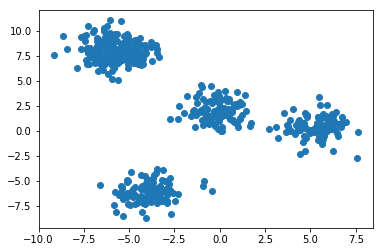

In [99]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1])

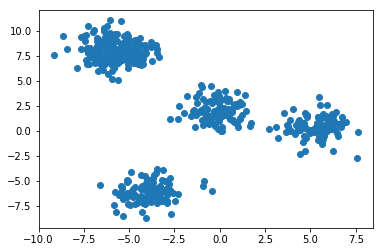

In [100]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1])
plt.show()

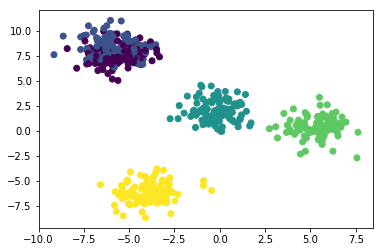

In [101]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

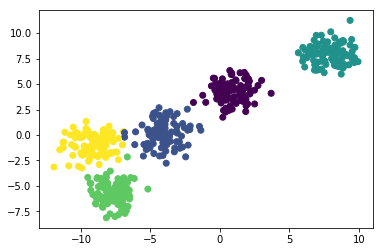

In [102]:
# Above clustering was overlapping that is why we are taking a different random_state here
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

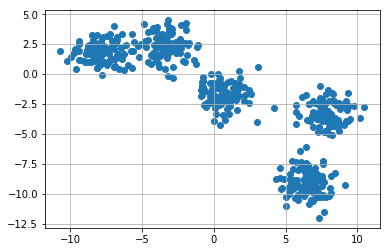

In [198]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=6)
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [199]:
X.shape

(500, 2)

In [200]:
np.random.random?
# Return random floats in the half-open interval [0.0, 1.0)

In [201]:
center = 10*(2*np.random.random((X.shape[1],))-1)
print(center)

[ 3.21621663 -6.30231755]


In [202]:
k = 5
color  = ["green","red","blue","yellow","orange"]
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)#Between -10 to 10
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }    
    clusters[i] = cluster

In [203]:
clusters

{0: {'center': array([-0.46285486, -4.80268329]),
  'color': 'green',
  'points': []},
 1: {'center': array([ 9.31639933, -8.10314016]),
  'color': 'red',
  'points': []},
 2: {'center': array([ 5.311351  , -6.59559177]),
  'color': 'blue',
  'points': []},
 3: {'center': array([-8.04161959,  0.92789827]),
  'color': 'yellow',
  'points': []},
 4: {'center': array([ 0.15276915, -1.6136848 ]),
  'color': 'orange',
  'points': []}}

In [204]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [205]:
v1=np.array([1,2])
v2=np.array([3,2])
distance(v1,v2)

2.0

In [206]:
# Assign every data point to one of the clusters
# K-Means is a special case of Expectation Maximization Problem
# E => Expectation 
# M => Maximization
def assignPointToClusters(clusters): #E-Step 
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist) # It will return the index of min value in the dist list 
        clusters[current_cluster]['points'].append(curr_x)

In [207]:
assignPointToClusters(clusters=clusters)

# 03. K-Means - Implementing M-Step

In [208]:
def updateClusters(clusters): 
    # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0) # along the x axis
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        #it will print no of  points in the cluster
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        #We are using try except here because it is possible that we will not get any point in the cluster 
        #That means initialization is not good one of the cluster centre is way too far
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")    

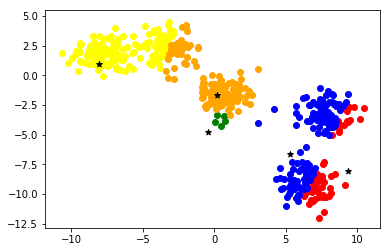

In [209]:
plotClusters(clusters)

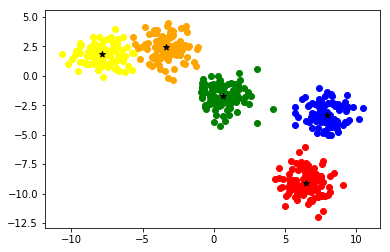

In [219]:
# Repeat this cell few times or put it inside a loop
# Here 10 times
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

# 05. K-Means ++ Making Better Initialisation

### K-Means++

- K-Means Random intialization can give bad local minima
- K-Means is quite sensitive to initalization, if the init is not good, our algorithm is not able to make desired number
of clusters.
- To overcome this problem, we use technique called K-Means++ (described in paper [Robust Seed Selection for K-Means type of Algorithms](https://arxiv.org/abs/1202.1585))
    which chooses initial centers so that they are statiscallly close to final ones.

- The method is default choice for sklearn, so we will use it directly without going into much maths!

Two different types of clustering oberserved for two different types of initialisations as discussed in the last example.

**Clustering - 1** 
<img src="../Pictures/init_2.png" alt="Pizza-1" style="width: 400px;"/>

**Clustering - 2**
<img src="../Pictures/init_1.png" alt="Pizza-1" style="width: 400px;"/>

### Using Sci-kit Learn

In [223]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [224]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [226]:
from sklearn.cluster import KMeans

### sklearn.cluster.KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### init : {‘k-means++’, ‘random’ or an ndarray}
Method for initialization, defaults to ‘k-means++’:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose k observations (rows) at random from data for the initial centroids.

If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

In [227]:
kmeans  = KMeans(n_clusters=5)

In [228]:
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [229]:
centers = kmeans.cluster_centers_

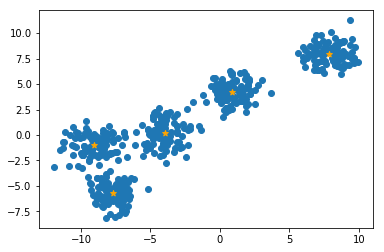

In [230]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.show()

In [231]:
pred = kmeans.labels_
print(pred)

[4 0 1 4 4 1 3 4 0 4 0 1 0 4 1 4 0 4 4 0 2 2 4 1 4 2 3 3 1 3 4 3 2 2 4 2 0
 0 4 2 2 2 3 3 1 0 0 3 3 3 0 4 3 4 4 2 4 4 0 1 0 1 1 4 3 0 1 1 2 1 2 4 2 4
 2 1 4 3 2 2 1 2 1 3 0 3 1 0 3 1 3 2 4 2 2 0 4 1 1 2 0 2 1 1 0 0 0 1 1 4 0
 3 4 0 1 2 0 3 2 1 0 1 3 4 2 3 3 3 4 4 1 1 4 0 0 3 1 3 1 4 4 2 1 0 3 4 0 0
 4 1 4 4 1 1 0 2 2 3 1 4 2 0 3 2 0 2 0 2 2 2 3 4 2 0 2 3 4 1 0 3 0 4 0 2 3
 3 2 4 1 0 2 1 3 4 3 2 1 3 4 4 4 2 2 0 4 3 3 4 0 4 4 4 2 0 1 0 4 4 0 3 1 3
 3 2 4 1 4 1 3 2 1 1 4 2 4 2 1 0 1 2 2 0 4 4 1 1 2 0 2 4 3 0 3 4 3 3 3 3 0
 2 0 4 2 0 3 1 0 0 0 3 4 4 1 2 2 0 1 1 4 1 3 1 0 0 3 3 2 3 3 0 2 4 1 2 1 3
 1 1 0 4 2 0 2 2 4 3 2 1 2 3 4 4 1 0 2 3 0 2 1 3 0 3 4 2 3 1 1 2 2 2 4 3 2
 4 0 1 1 3 0 0 1 1 3 2 2 2 4 3 0 3 4 2 0 0 1 2 2 3 2 3 1 1 1 3 2 4 2 1 3 3
 0 4 0 3 4 3 1 0 2 0 1 4 4 0 0 2 0 2 3 1 0 3 4 4 0 1 2 3 4 4 4 3 0 2 0 0 0
 3 2 1 0 1 1 3 1 4 1 4 0 2 2 4 0 3 4 2 1 0 3 1 3 3 0 3 1 3 0 3 1 3 4 2 2 3
 2 0 2 2 3 4 4 1 3 2 1 3 1 0 1 0 4 2 1 4 1 4 4 2 4 2 3 0 0 1 4 4 3 3 0 3 3
 0 3 0 0 0 3 2 3 1 0 1 1 

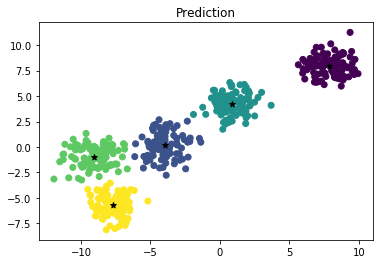

In [232]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.title("Prediction")
plt.show()

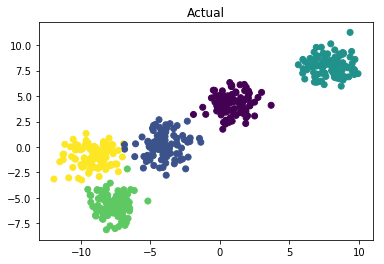

In [233]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.show()

# 06. K-Means can still Fail

In [250]:
import matplotlib.pyplot as plt

In [251]:
from sklearn.datasets import make_circles,make_moons

In [252]:
X,Y=make_moons(n_samples=200,noise=0.1)

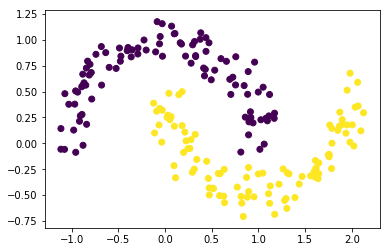

In [253]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [254]:
# This is not linearly seperable and hence K-Means will not work here

In [255]:
from sklearn.cluster import KMeans

In [256]:
km=KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [257]:
centers=km.cluster_centers_
labels=km.labels_

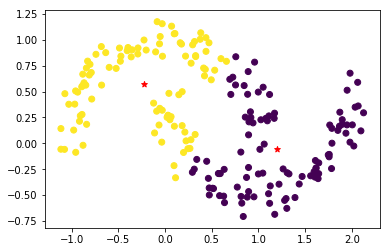

In [266]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='red',marker='*')
plt.show()

In [260]:
# We can clearly see that K-Means is not giving the expected output here

# 07. K-Means vs DBSCAN

### DBSCAN
- Density Based Spatial Clustering of Applications with Noise
- Based upon the idea, that a cluster is a high density area surrounded by low density region 
- Starts by exploring a small area, if density is "good enough" it considered as part of cluster,
- and explores neighbours and so on, so it groups regions based upon density!

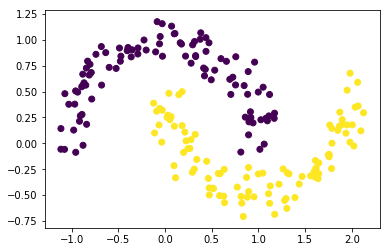

In [267]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [268]:
from sklearn.cluster import DBSCAN

In [269]:
dbs=DBSCAN?

### Parameters
----------
eps : float, optional
    The maximum distance between two samples for them to be considered
    as in the same neighborhood.

min_samples : int, optional
    The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. This includes the point itself.

In [271]:
dbs=DBSCAN(eps=0.1,min_samples=5)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [272]:
Ypred=dbs.fit_predict(X)
print(Ypred)

[ 0 -1 -1 -1 -1  1  2  8  0 -1  0 -1  3 -1  7  2  0 -1 -1  4 -1 -1  5  6
 -1  5 -1 -1  5 -1  6  7 -1  6 -1 -1  4 -1 -1  1 -1  6  5 -1  4  3 -1  5
  9  3 -1  5 -1 -1 -1  1 -1 -1 -1  6 -1 -1 -1  0  4  1 -1 -1 -1  4  0 -1
 -1 -1 -1  4 -1  1 -1 -1 -1  8  4 -1 -1 -1  2 -1  8  1 -1 -1 -1 -1 -1  0
 -1 -1 -1  7 -1 -1 -1 -1  6  4 -1  8 -1  7  9  0 -1 -1 -1 -1 -1 -1 -1 -1
  0  9  5  8 -1 -1 -1  5 -1  1 -1 -1  2  1  3 -1  1  5  7 -1 -1 -1 -1  3
 -1  4 -1  9 -1 -1 -1  4  3  1  9 -1 -1 -1 -1  6  0 -1  6  2 -1  3 -1  5
  2 -1  8  0  9  6 -1  3 -1 -1 -1 -1  5  6 -1 -1 -1  2 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1  3  7 -1]


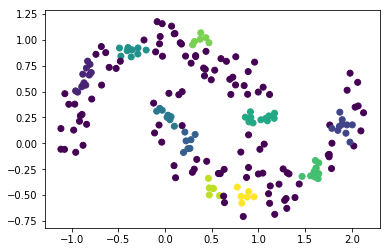

In [273]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

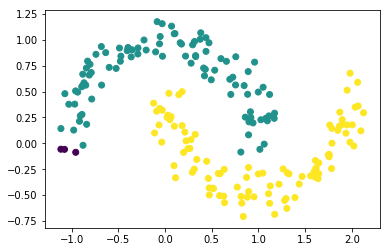

In [282]:
dbs=DBSCAN(eps=0.2,min_samples=5)
Ypred=dbs.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

In [283]:
# You can't provide the no. of classes you want but it still does a better job than K-Means 
# in cases which are not linearly seperable or complex